In [3]:
import pandas as pd


df = pd.read_csv('netflix.csv')

print(df.columns)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [4]:
#Pretratamiento de datos
#director has 2389 (30.7%) missing values	Missing
#cast has 718 (9.2%) missing values	Missing
#country has 507 (6.5%) missing values	Missing
#show_id has unique values	Unique
#title has unique values

df['director']=df['director'].fillna('Desconocido')

df['cast']=df['cast'].fillna('Desconocido/s')

df['country']=df['country'].fillna('Desconocido')


Se recomienda utilizar la siguiente paleta de colores aunque pueden utilizar otras:
['#f5f5f1', '#e50914', '#b20710', '#221f1f']

Los colores en la paleta personalizada custom_palette = ['#f5f5f1', '#e50914', '#b20710', '#221f1f'] son los siguientes:

#f5f5f1: Un color blanco muy claro, casi marfil. Este color es sutil y puede ser utilizado para elementos de fondo o detalles que no necesitan destacar mucho.

#e50914: Un rojo brillante y saturado, similar al rojo que usa Netflix en su branding. Es un color fuerte que capta la atención y puede usarse para elementos que necesiten resaltar.

#b20710: Un rojo oscuro, más profundo que el anterior. Este color también es intenso, pero tiene un tono más sobrio y elegante, lo que lo hace útil para destacar sin ser tan llamativo como el rojo brillante.

#221f1f: Un color negro con un tinte muy leve de marrón o gris oscuro. Es un color neutro y serio, excelente para contrastar con los colores más brillantes de la paleta.

Esta combinación de colores es poderosa y sofisticada, ideal para gráficos que buscan un diseño moderno, llamativo y con una estética visual fuerte.

C:\Users\P\AppData\Local\Temp\ipykernel_21552\3116523097.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(y='type', x='count',data=type_counts_sorted, palette=colors, edgecolor="black", orient='h')


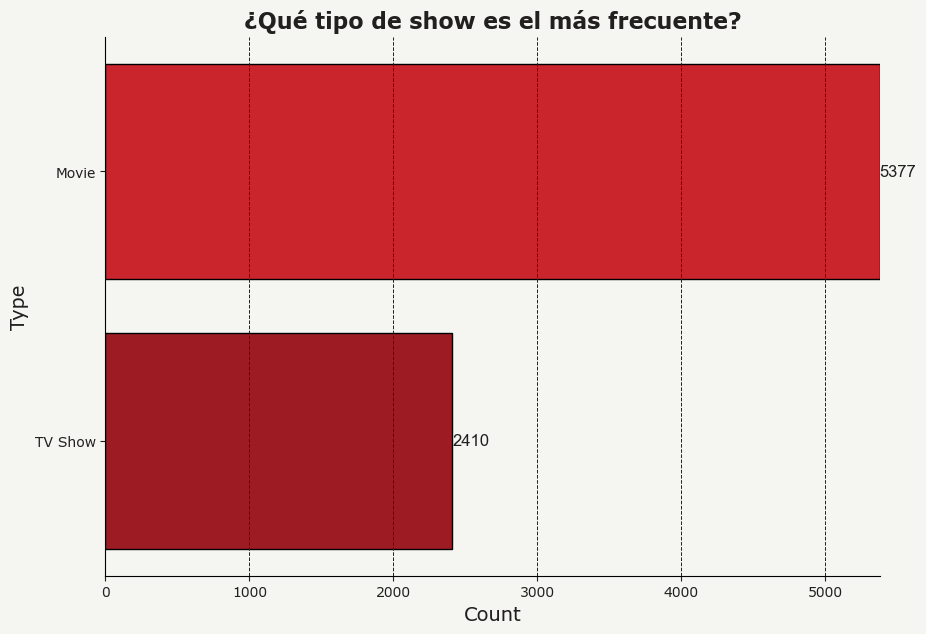

In [5]:
 #1. ¿Qué tipo de show es el más frecuente?

import matplotlib.pyplot as plt
import seaborn as sns

# Definir colores personalizados
bright_red = '#e50914'  # Rojo brillante para la barra más grande
dark_red = '#b20710'    # Rojo oscuro para las demás barras
background_color = '#f5f5f1'  # Color de fondo blanco
text_color = '#221f1f'  # Color de las letras negro

plt.rcParams['font.family'] = 'Verdana'  # Cambia 'Roboto' por el nombre de la fuente que hayas instalado


# Contar las ocurrencias y ordenar
type_counts = df['type'].value_counts().reset_index()
type_counts.columns = ['type', 'count']
type_counts_sorted = type_counts.sort_values(by='count', ascending=False)

# Crear la paleta de colores para las barras
colors = [bright_red if i == 0 else dark_red for i in range(len(type_counts_sorted))]

# Configurar el fondo y las letras
plt.figure(figsize=(10, 7), facecolor=background_color)
plt.gca().set_facecolor(background_color)
sns.set(style="whitegrid", rc={"axes.facecolor": background_color})

# Crear el gráfico de barras horizontales
barplot = sns.barplot(y='type', x='count',data=type_counts_sorted, palette=colors, edgecolor="black", orient='h')

# Cambiar color de las letras
barplot.set_xlabel('Count', fontsize=14, color=text_color)
barplot.set_ylabel('Type', fontsize=14, color=text_color)
barplot.set_title('¿Qué tipo de show es el más frecuente?', fontsize=16, fontweight='bold', color=text_color)
barplot.tick_params(axis='x', colors=text_color)
barplot.tick_params(axis='y', colors=text_color)

# Añadir etiquetas de valor al final de las barras
for index, value in enumerate(type_counts_sorted['count']):
    plt.text(value + 1, index, f'{value}', va='center', fontsize=12, color=text_color)

# Añadir un margen al final de las barras
plt.xlim(0, type_counts_sorted['count'].max() + 5)

# Cambiar color de la cuadrícula
plt.grid(True, which='both', axis='x', linestyle='--', linewidth=0.7, color=text_color)

# Eliminar el borde superior y derecho
sns.despine()

# Mostrar el gráfico
plt.show()


# 2. ¿En qué año se produjeron más películas y series?

## Top 10 años con más peliculas y series

C:\Users\P\AppData\Local\Temp\ipykernel_21552\144476824.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


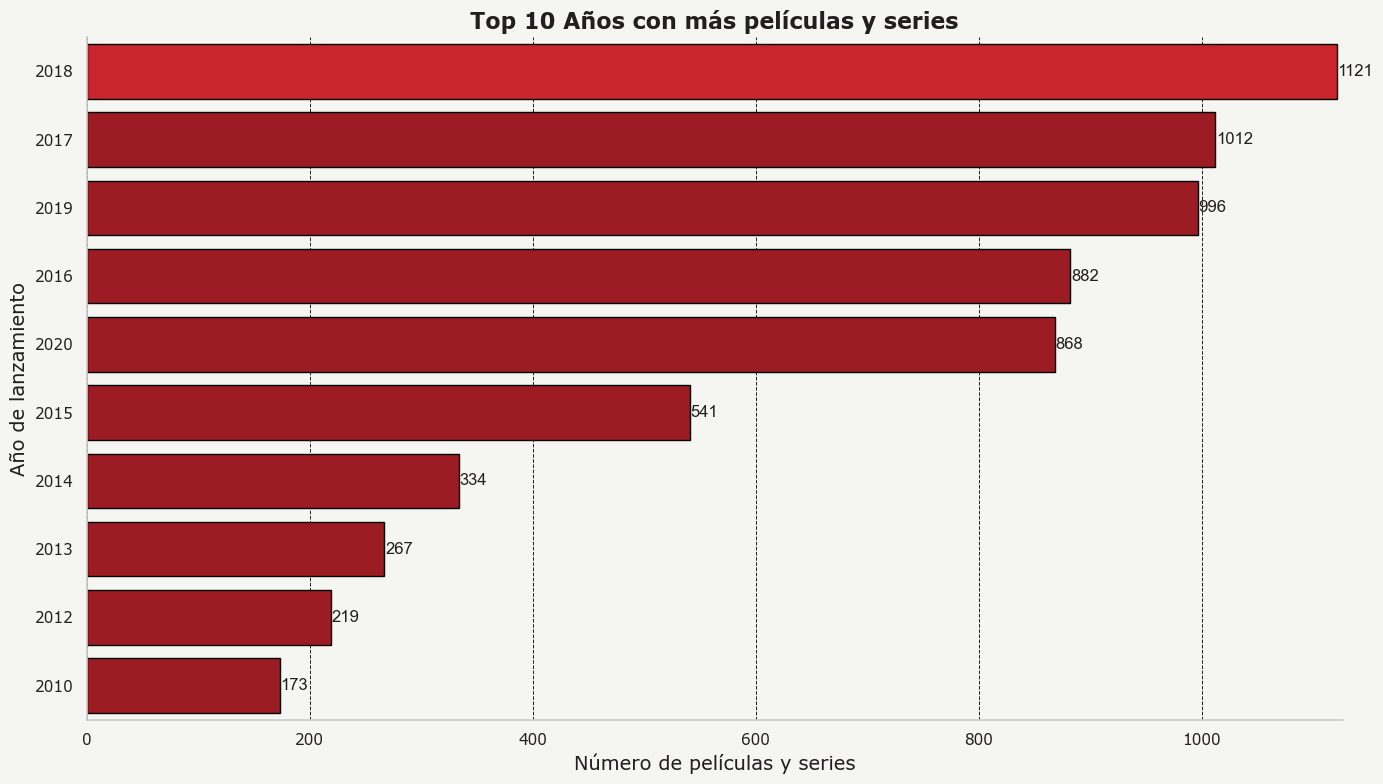

In [6]:

# Definir colores personalizados
bright_red = '#e50914'  # Rojo brillante para la barra más grande
dark_red = '#b20710'    # Rojo oscuro para las demás barras
background_color = '#f5f5f1'  # Color de fondo blanco
text_color = '#221f1f'  # Color de las letras negro

plt.rcParams['font.family'] = 'Verdana'  # Asegúrate de que esta fuente esté instalada

# Contar el número de películas por año
year_counts = df['release_year'].value_counts().reset_index()
year_counts.columns = ['release_year', 'count']

# Ordenar por el número de películas y obtener los 10 años con más películas
year_counts_sorted = year_counts.sort_values(by='count', ascending=False).head(10)

# Aplicar el color rojo brillante al año con más películas
max_count = year_counts_sorted['count'].max()

# Crear paleta de colores donde el año con más películas tiene el color rojo brillante
colors = [bright_red if count == max_count else dark_red for count in year_counts_sorted['count']]

# Crear el gráfico de barras
plt.figure(figsize=(14, 8), facecolor=background_color)
plt.gca().set_facecolor(background_color)
sns.set(style="whitegrid", rc={"axes.facecolor": background_color})

# Graficar las barras, utilizando `order` para asegurar que respete el orden del DataFrame
barplot = sns.barplot(
    y='release_year', 
    x='count', 
    data=year_counts_sorted, 
    palette=colors, 
    edgecolor="black", 
    orient='h',
    order=year_counts_sorted['release_year']  # Asegura el orden en el gráfico
)

# Personalizar etiquetas y título
barplot.set_xlabel('Número de películas y series', fontsize=14, color=text_color)
barplot.set_ylabel('Año de lanzamiento', fontsize=14, color=text_color)
barplot.set_title('Top 10 Años con más películas y series', fontsize=16, fontweight='bold', color=text_color)
barplot.tick_params(axis='x', colors=text_color)
barplot.tick_params(axis='y', colors=text_color)

# Añadir etiquetas de valor al final de las barras
for index, value in enumerate(year_counts_sorted['count']):
    plt.text(value + 0.5, index, f'{value}', va='center', fontsize=12, color=text_color, ha='left')

# Añadir un margen al final de las barras
plt.xlim(0, year_counts_sorted['count'].max() + 5)

# Cambiar color de la cuadrícula
plt.grid(True, which='both', axis='x', linestyle='--', linewidth=0.7, color=text_color)

# Eliminar el borde superior y derecho
sns.despine()

plt.tight_layout()  # Ajustar el diseño para evitar superposiciones

# Mostrar el gráfico
plt.show()



## Evolución con más peliculas y series

In [7]:
import plotly.graph_objects as go
import pandas as pd

# Definir colores personalizados
bright_red = '#e50914'  # Rojo brillante para resaltar
dark_red = '#b20710'    # Rojo oscuro para la línea principal
background_color = '#f5f5f1'  # Color de fondo blanco
text_color = '#221f1f'  # Color de las letras negro

# Contar el número de películas por año
year_counts = df['release_year'].value_counts().reset_index()
year_counts.columns = ['release_year', 'count']

# Ordenar por año
year_counts_sorted = year_counts.sort_values(by='release_year')

# Filtrar solo hasta el año 2020
year_counts_sorted = year_counts_sorted[year_counts_sorted['release_year'] <= 2020]

# Encontrar el valor máximo
max_year = year_counts_sorted.loc[year_counts_sorted['count'].idxmax(), 'release_year']
max_count = year_counts_sorted['count'].max()

# Filtrar los años donde hay más de 100 películas
years_above_100 = year_counts_sorted[year_counts_sorted['count'] > 100]

# Encontrar el primer año en el que se superaron las 100 películas
first_above_100_year = years_above_100.iloc[0]['release_year']
first_above_100_count = years_above_100.iloc[0]['count']

# Crear la gráfica con Plotly
fig = go.Figure()

# Agregar línea principal
fig.add_trace(go.Scatter(
    x=year_counts_sorted['release_year'], 
    y=year_counts_sorted['count'], 
    mode='lines',
    line=dict(color=dark_red, width=3),
    name='Películas por año'
))

# Resaltar el punto máximo
fig.add_trace(go.Scatter(
    x=[max_year], 
    y=[max_count], 
    mode='markers+text',
    text=[f'Máximo: {max_year}'],
    textposition="top center",
    marker=dict(color=bright_red, size=12),
    name='Máximo'
))

# Resaltar el primer año con más de 100 películas
fig.add_trace(go.Scatter(
    x=[first_above_100_year], 
    y=[first_above_100_count], 
    mode='markers+text',
    text=[f'Barrera de 100 películas: {first_above_100_year}'],
    textposition="middle right",
    marker=dict(color='blue', size=12, symbol='circle'),
    name='Primer año > 100'
))

# Configurar el gráfico
fig.update_layout(
    title='Evolución de la cantidad de películas y series por año',
    xaxis_title='Año de lanzamiento',
    yaxis_title='Número de películas',
    plot_bgcolor=background_color,
    paper_bgcolor=background_color,
    font=dict(color=text_color),
    width=1100,  
    height=800
)

# Mostrar el gráfico
fig.show()



ModuleNotFoundError: No module named 'plotly'

# 3. ¿Qué países aportan más películas y series de TV?

In [ ]:
import plotly.express as px
import pandas as pd

# Definir colores personalizados más saturados
bright_red = '#e50914'  # Rojo brillante para el valor máximo
dark_red = '#b20710'    # Rojo oscuro para el valor mínimo
background_color = '#f5f5f1'  # Color de fondo blanco
text_color = '#221f1f'  # Color de las letras negro


# Dividir las coproducciones y contar las películas por país
# Dividir las cadenas de países en listas
df['country'] = df['country'].str.split(', ')

# Explorar la lista para tener una fila por país
df_exploded = df.explode('country')

# Contar el número de películas por país
country_counts = df_exploded['country'].value_counts().reset_index()
country_counts.columns = ['country', 'count']

# Crear el mapa de calor con colores más saturados
fig = px.choropleth(
    country_counts,
    locations='country',
    locationmode='country names',
    color='count',
    color_continuous_scale=[background_color, dark_red, bright_red],  # De blanco a rojo oscuro a rojo brillante
    labels={'count': 'Número de películas y series'},
    title='Número de películas y series por país',
    template='plotly_white'  # Utiliza un fondo blanco para que coincida con el esquema de colores
)

# Configurar el mapa
fig.update_layout(
    coloraxis_colorbar=dict(
        title='Número de películas y series',
        tickvals=[0, country_counts['count'].max()],
        ticktext=['0', str(country_counts['count'].max())]
    ),
    font=dict(color=text_color),
    width=1100,  
    height=800
)

# Mostrar el gráfico
fig.show()


C:\Users\P\AppData\Local\Temp\ipykernel_21552\2797180170.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(y='country', x='count', data=country_counts_filtered_sorted, palette=colors, edgecolor="black", orient='h')


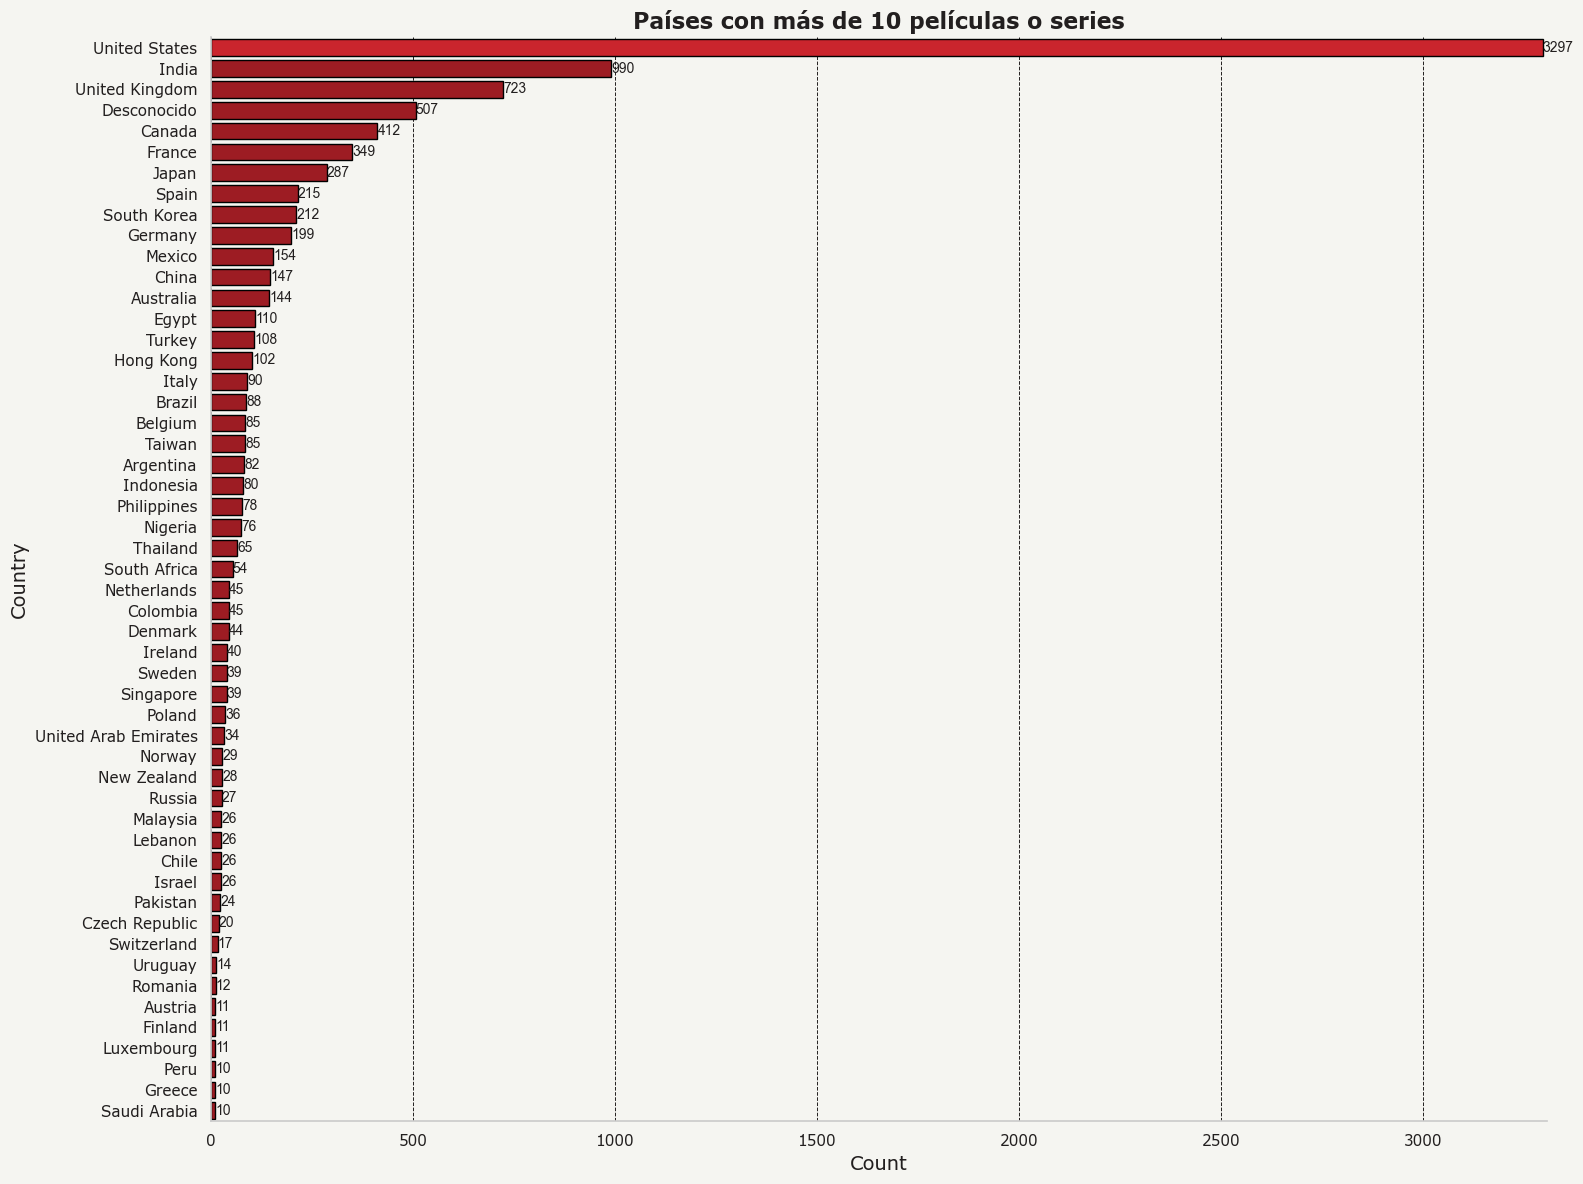

In [8]:
#Paises que hicieron mas de 10 peliculas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Definir colores personalizados
bright_red = '#e50914'  # Rojo brillante para la barra más grande
dark_red = '#b20710'    # Rojo oscuro para las demás barras
background_color = '#f5f5f1'  # Color de fondo blanco
text_color = '#221f1f'  # Color de las letras negro

plt.rcParams['font.family'] = 'Verdana'  # Asegúrate de que esta fuente esté instalada

# Supongamos que df es tu DataFrame
# Aquí dividimos la columna 'country' en países individuales
df_expanded = df.assign(country=df['country'].str.split(',')).explode('country').reset_index(drop=True)

# Limpiar espacios alrededor de los nombres de los países
df_expanded['country'] = df_expanded['country'].str.strip()

# Contar las ocurrencias y ordenar
country_counts = df_expanded['country'].value_counts().reset_index()
country_counts.columns = ['country', 'count']

# Filtrar países con más de 10 películas
country_counts_filtered = country_counts[country_counts['count'] > 9]

# Ordenar por la cantidad de películas
country_counts_filtered_sorted = country_counts_filtered.sort_values(by='count', ascending=False)

# Crear la paleta de colores para las barras
colors = [bright_red if i == 0 else dark_red for i in range(len(country_counts_filtered_sorted))]

# Configurar el fondo y las letras
plt.figure(figsize=(16, 12), facecolor=background_color)
plt.gca().set_facecolor(background_color)
sns.set(style="whitegrid", rc={"axes.facecolor": background_color})

# Crear el gráfico de barras horizontales
barplot = sns.barplot(y='country', x='count', data=country_counts_filtered_sorted, palette=colors, edgecolor="black", orient='h')

# Cambiar color de las letras
barplot.set_xlabel('Count', fontsize=14, color=text_color)
barplot.set_ylabel('Country', fontsize=14, color=text_color)
barplot.set_title('Países con más de 10 películas o series', fontsize=16, fontweight='bold', color=text_color)
barplot.tick_params(axis='x', colors=text_color)
barplot.tick_params(axis='y', colors=text_color)

# Añadir etiquetas de valor al final de las barras
for index, value in enumerate(country_counts_filtered_sorted['count']):
    plt.text(value + 0.5, index, f'{value}', va='center', fontsize=10, color=text_color, ha='left')

# Ajustar márgenes
plt.xlim(0, country_counts_filtered_sorted['count'].max() + 10)

# Cambiar color de la cuadrícula
plt.grid(True, which='both', axis='x', linestyle='--', linewidth=0.7, color=text_color)

# Eliminar el borde superior y derecho
sns.despine()

# Mostrar el gráfico
plt.tight_layout()  # Ajustar el diseño para evitar superposiciones
plt.show()


In [9]:
#4. ¿Cómo se distribuye la cantidad de series y películas segúnrating?

print(df['country'])

0                                                  Brazil
1                                                  Mexico
2                                               Singapore
3                                           United States
4                                           United States
                              ...                        
7782    Sweden, Czech Republic, United Kingdom, Denmar...
7783                                                India
7784                                          Desconocido
7785                                            Australia
7786                United Kingdom, Canada, United States
Name: country, Length: 7787, dtype: object


In [10]:
#5. ¿Cómo se distribuye la audiencia objetivo (usar rating para esto)
#   según el origen de los shows?

# 6. ¿Cómo se distribuye la cantidad de series y películas según cada mes? Varía la categoría (listed in) según el mes del año?

## Parte a)

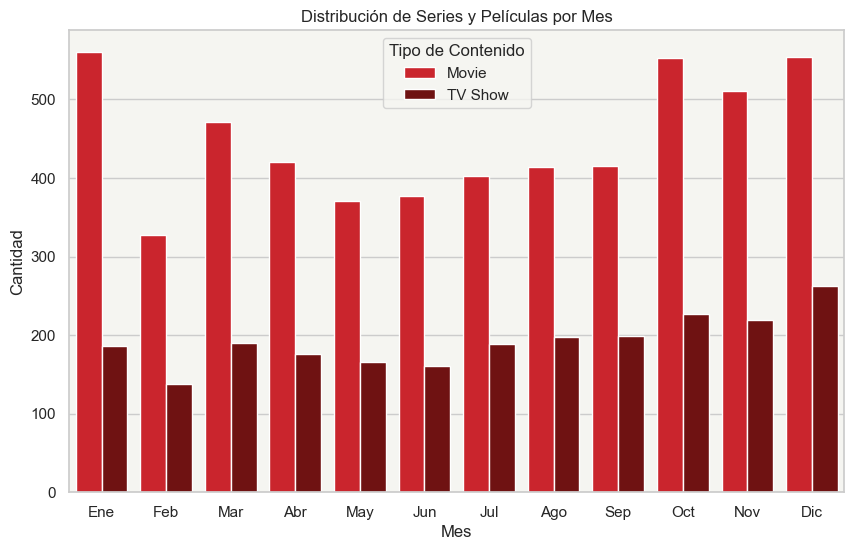

In [11]:
# Convertir 'date_added' a formato datetime y extraer el mes
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['month_added'] = df['date_added'].dt.month

# Agrupar por mes y tipo (series o películas)
content_by_month = df.groupby(['month_added', 'type']).size().reset_index(name='count')

# Configurar la paleta de colores sugerida
colors = ['#e50914', '#7f0202']

# Graficar la distribución de series y películas por mes
plt.figure(figsize=(10, 6))
sns.barplot(data=content_by_month, x='month_added', y='count', hue='type', palette=colors)
plt.title('Distribución de Series y Películas por Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.xticks(ticks=range(0, 12), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.legend(title='Tipo de Contenido')
plt.show()


## Parte b)

In [12]:
unique_categories = df['listed_in'].unique()

# Imprimir los valores únicos
print("Valores únicos en 'listed_in':")
print(unique_categories)

Valores únicos en 'listed_in':
['International TV Shows, TV Dramas, TV Sci-Fi & Fantasy'
 'Dramas, International Movies' 'Horror Movies, International Movies'
 'Action & Adventure, Independent Movies, Sci-Fi & Fantasy' 'Dramas'
 'International TV Shows, TV Dramas, TV Mysteries'
 'Horror Movies, International Movies, Thrillers' 'Dramas, Thrillers'
 'Crime TV Shows, International TV Shows, TV Dramas'
 'Crime TV Shows, Docuseries, International TV Shows'
 'Documentaries, International Movies, Sports Movies'
 'Independent Movies, Sci-Fi & Fantasy, Thrillers'
 'Dramas, International Movies, Thrillers'
 'International TV Shows, TV Dramas'
 'Comedies, Dramas, Independent Movies' 'Sports Movies'
 'Dramas, Independent Movies, International Movies'
 'Action & Adventure, Dramas, International Movies'
 'Anime Series, International TV Shows' 'Documentaries' 'Reality TV'
 'Documentaries, International Movies' 'TV Comedies'
 'Dramas, International Movies, Romantic Movies' 'Comedies'
 'Comedies, Roman

In [13]:
from collections import Counter

# Dividir las categorías por comas y luego aplanar la lista
categories = df['listed_in'].str.split(', ').explode()

# Contar cuántas veces aparece cada categoría
category_counts = categories.value_counts()

# Mostrar los resultados
print(category_counts)


listed_in
International Movies            2437
Dramas                          2106
Comedies                        1471
International TV Shows          1199
Documentaries                    786
Action & Adventure               721
TV Dramas                        704
Independent Movies               673
Children & Family Movies         532
Romantic Movies                  531
TV Comedies                      525
Thrillers                        491
Crime TV Shows                   427
Kids' TV                         414
Docuseries                       353
Romantic TV Shows                333
Stand-Up Comedy                  329
Music & Musicals                 321
Horror Movies                    312
British TV Shows                 232
Reality TV                       222
Sci-Fi & Fantasy                 218
Sports Movies                    196
Korean TV Shows                  150
TV Action & Adventure            150
Anime Series                     148
Spanish-Language TV Shows   

In [14]:
# Reemplazar la palabra 'TV' con una cadena vacía
df['listed_in'] = df['listed_in'].str.replace('TV', '', regex=False)

# Dividir las categorías por comas
categories = df['listed_in'].str.split(', ', expand=True)

# Aplicar str.strip() a todas las categorías para eliminar espacios adicionales
categories = categories.apply(lambda x: x.str.strip())

# Contar la frecuencia de cada categoría después de dividir y limpiar
category_counts = categories.stack().value_counts()

# Mostrar las categorías y sus conteos
print(category_counts)

Dramas                          2810
International Movies            2437
Comedies                        1996
International  Shows            1199
Action & Adventure               871
Documentaries                    786
Independent Movies               673
Thrillers                        541
Children & Family Movies         532
Romantic Movies                  531
Crime  Shows                     427
Kids'                            414
Docuseries                       353
Romantic  Shows                  333
Stand-Up Comedy                  329
Music & Musicals                 321
Horror Movies                    312
Sci-Fi & Fantasy                 294
British  Shows                   232
Reality                          222
Sports Movies                    196
Korean  Shows                    150
Anime Series                     148
Spanish-Language  Shows          147
Classic Movies                   103
LGBTQ Movies                      90
Mysteries                         90
S

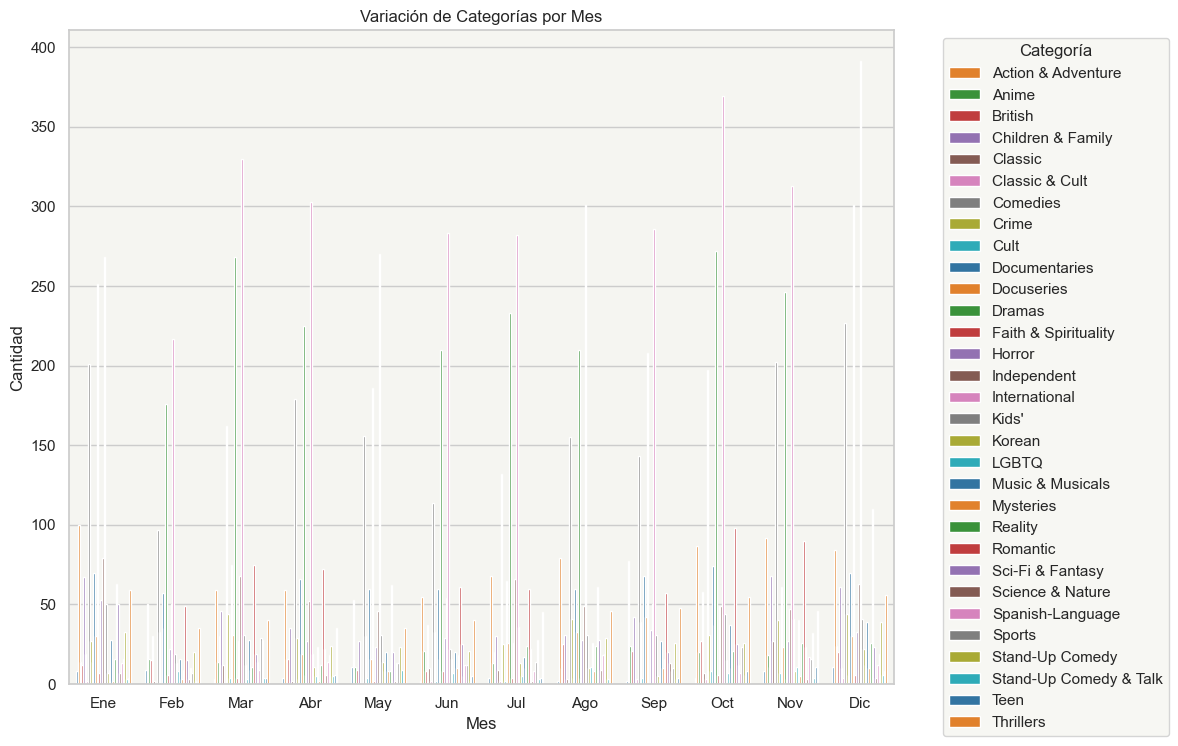

In [15]:
# Reemplazar 'TV', 'Movies', 'Shows', 'Series', 'Features' y limpiar espacios
df['listed_in'] = df['listed_in'].replace(['TV', 'Movies', 'Shows', 'Series', 'Features'], '', regex=True).str.strip()

# Dividir las categorías por comas, luego limpiar espacios adicionales en cada categoría
df['categories'] = df['listed_in'].str.split(', ').apply(lambda x: [i.strip() for i in x])

# Explode para convertir cada categoría en una fila independiente
df_exploded = df.explode('categories')

# Agrupar por mes y categoría (individual después del explode)
content_by_month_category = df_exploded.groupby(['month_added', 'categories']).size().reset_index(name='count')

# Graficar la variación de la categoría según el mes
plt.figure(figsize=(12, 8))
sns.barplot(data=content_by_month_category, x='month_added', y='count', hue='categories', palette='tab10')

plt.title('Variación de Categorías por Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.xticks(ticks=range(0, 12), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



C:\Users\P\AppData\Local\Temp\ipykernel_21552\1232592238.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_categories_by_month = content_by_month_category.groupby('month_added').apply(lambda x: x.nlargest(10, 'count')).reset_index(drop=True)


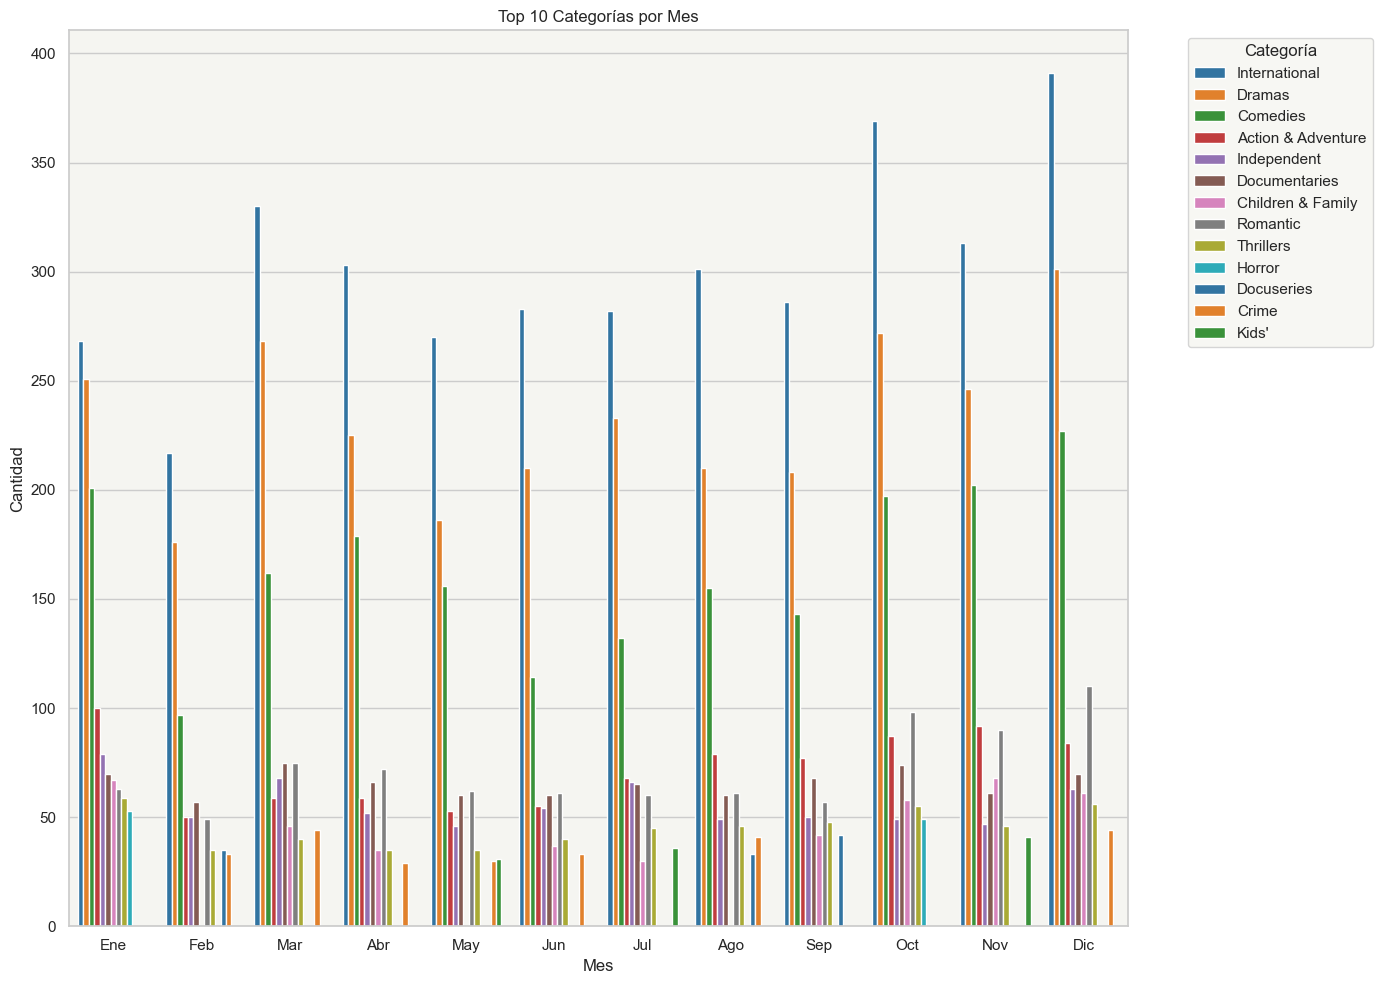

In [16]:
# Reemplazar 'TV', 'Movies', 'Shows', 'Series', 'Features' y limpiar espacios
df['listed_in'] = df['listed_in'].replace(['TV', 'Movies', 'Shows', 'Series', 'Features'], '', regex=True).str.strip()

# Dividir las categorías por comas, luego limpiar espacios adicionales en cada categoría
df['categories'] = df['listed_in'].str.split(', ').apply(lambda x: [i.strip() for i in x])

# Explode para convertir cada categoría en una fila independiente
df_exploded = df.explode('categories')

# Agrupar por mes y categoría (individual después del explode)
content_by_month_category = df_exploded.groupby(['month_added', 'categories']).size().reset_index(name='count')

# Filtrar las top 10 categorías por mes
top_categories_by_month = content_by_month_category.groupby('month_added').apply(lambda x: x.nlargest(10, 'count')).reset_index(drop=True)

# Graficar la variación de la categoría según el mes
plt.figure(figsize=(14, 10))
sns.barplot(data=top_categories_by_month, x='month_added', y='count', hue='categories', palette='tab10')

plt.title('Top 10 Categorías por Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.xticks(ticks=range(0, 12), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


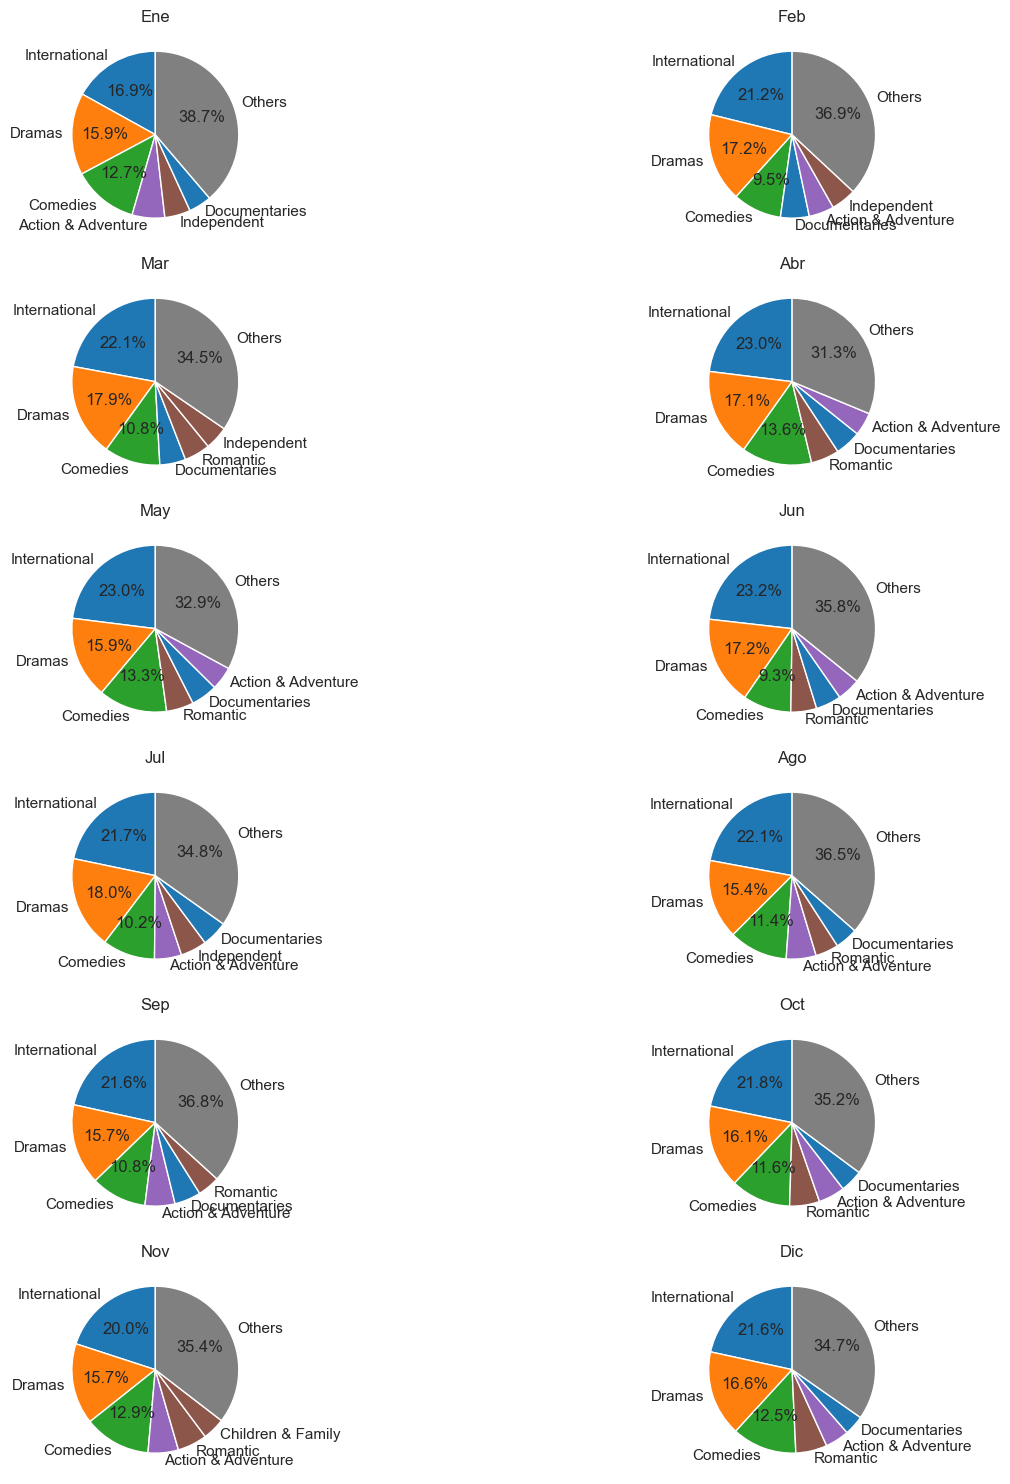

In [17]:
# Crear una lista de iniciales para los meses
month_initials = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

# Crear una lista de colores para las categorías
unique_categories = df_exploded['categories'].unique()
colors_palette = sns.color_palette('tab10', n_colors=len(unique_categories))

# Crear un diccionario para mapear cada categoría a un color
category_color_map = dict(zip(unique_categories, colors_palette))

# Definir cuántos subplots (gráficos) habrá en cada fila y columna
n_cols = 2
n_rows = (len(month_initials) + n_cols - 1) // n_cols  # Calcular cuántas filas se necesitan

# Función para mostrar solo porcentajes mayores a 8%
def autopct_func(pct):
    return ('%1.1f%%' % pct) if pct > 8 else ''

# Crear una figura con subplots para cada mes
plt.figure(figsize=(15, 15))

# Iterar a través de los meses únicos
for i, month in enumerate(range(1, 13), 1):  # De 1 a 12 para representar cada mes
    plt.subplot(n_rows, n_cols, i)  # Ajustar filas y columnas según la cantidad de meses
    
    # Filtrar los datos para el mes actual
    monthly_data = df_exploded[df_exploded['month_added'] == month]['categories'].value_counts()
    
    # Separar las 6 categorías principales
    top_6_categories = monthly_data.head(6)
    
    # Calcular la suma de las categorías restantes
    others_count = monthly_data[6:].sum()
    
    # Agregar la categoría "Others" con su suma
    top_6_categories['Others'] = others_count
    
    # Obtener los colores correspondientes a las categorías principales y a "Others"
    top_6_labels = top_6_categories.index
    colors = [category_color_map[category] if category in category_color_map else 'gray' for category in top_6_labels]
    
    # Graficar el pastel solo con las 6 principales + "Others", mostrando solo porcentajes > 8%
    plt.pie(top_6_categories, labels=top_6_labels, autopct=autopct_func, startangle=90, colors=colors)
    
    # Asignar el título con las iniciales del mes
    plt.title(f'{month_initials[month - 1]}')  # Restar 1 ya que `month` va de 1 a 12

plt.tight_layout()
plt.show()


# 7. ¿Cuáles son los directores más populares?

In [18]:
unique_directors = df['director'].unique()

# Imprimir los valores únicos
print("Valores únicos en 'directors':")
print(unique_directors)

# Mostrar los directores de la primera película
first_movie_directors = df['director'].iloc[2]
print("Directores de la primera película:", first_movie_directors)


Valores únicos en 'directors':
['Desconocido' 'Jorge Michel Grau' 'Gilbert Chan' ... 'Josef Fares'
 'Mozez Singh' 'Sam Dunn']
Directores de la primera película: Gilbert Chan


Top 10 Directores más Populares:
directors
Jan Suter              21
Raúl Campos            19
Marcus Raboy           16
Jay Karas              15
Cathy Garcia-Molina    13
Jay Chapman            12
Youssef Chahine        12
Martin Scorsese        12
Steven Spielberg       10
Shannon Hartman         9
Name: count, dtype: int64


C:\Users\P\AppData\Local\Temp\ipykernel_21552\2167825473.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_10_directors.values, y=top_10_directors.index, palette=netflix_colors)
C:\Users\P\AppData\Local\Temp\ipykernel_21552\2167825473.py:30: UserWarning: 
The palette list has fewer values (1) than needed (10) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x=top_10_directors.values, y=top_10_directors.index, palette=netflix_colors)


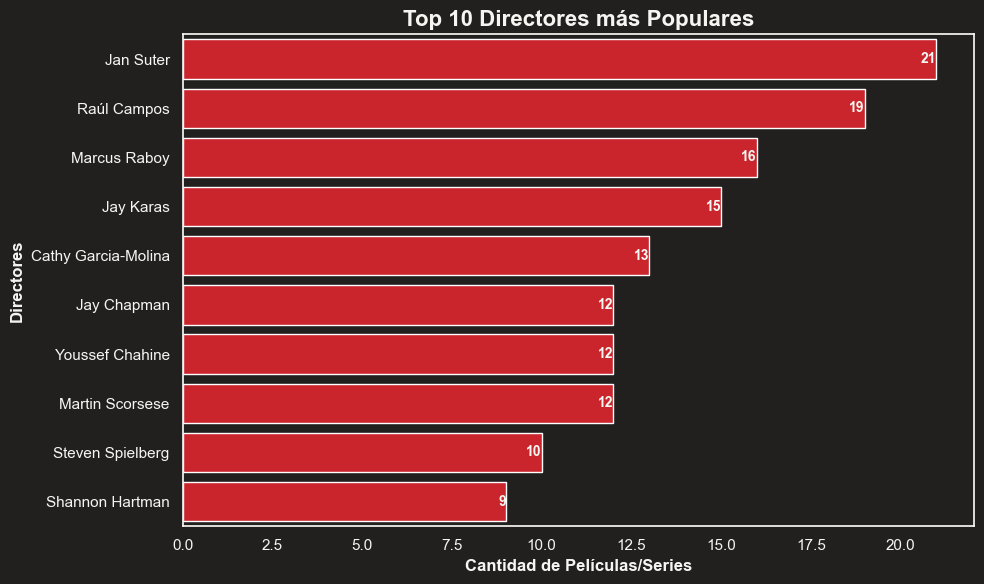

In [25]:
# Rellenar valores nulos en la columna de directores con una cadena vacía
df['director'] = df['director'].fillna('')

# Reemplazar posibles espacios adicionales alrededor de los nombres de los directores
df['director'] = df['director'].str.strip()

# Dividir los directores por comas, luego limpiar espacios adicionales en cada nombre
df['directors'] = df['director'].str.split(', ').apply(lambda x: [i.strip() for i in x if i])

# Usar explode para separar cada director en filas individuales
df_exploded_directors = df.explode('directors')

# Filtrar los directores desconocidos (consideramos los vacíos o un valor como "Desconocido")
df_exploded_directors = df_exploded_directors[df_exploded_directors['directors'] != 'Desconocido']

# Contar la cantidad de veces que aparece cada director
director_counts = df_exploded_directors['directors'].value_counts()

# Mostrar los directores más populares
top_10_directors = director_counts.head(10)

print("Top 10 Directores más Populares:")
print(top_10_directors)

# Definir la paleta de colores personalizada de Netflix
netflix_colors = ['#e50914']

# Graficar los 10 directores más populares
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_10_directors.values, y=top_10_directors.index, palette=netflix_colors)

# Personalización del gráfico
plt.title('Top 10 Directores más Populares', fontsize=16, color='#f5f5f1', weight='bold')
plt.xlabel('Cantidad de Películas/Series', fontsize=12, color='#f5f5f1', weight='bold')
plt.ylabel('Directores', fontsize=12, color='#f5f5f1', weight='bold')

# Ajustes de estilo
plt.xticks(color='#f5f5f1')
plt.yticks(color='#f5f5f1')

# Cambiar el color de las líneas del eje
ax.spines['top'].set_color('#f5f5f1')
ax.spines['right'].set_color('#f5f5f1')
ax.spines['left'].set_color('#f5f5f1')
ax.spines['bottom'].set_color('#f5f5f1')

# Cambiar el color de las marcas de los ejes
ax.xaxis.set_tick_params(color='#f5f5f1')
ax.yaxis.set_tick_params(color='#f5f5f1')

# Fondo del gráfico
plt.gca().set_facecolor('#221f1f')
plt.grid(False)  # Desactivar la rejilla

# Color del fondo general de la figura
plt.gcf().set_facecolor('#221f1f')

# Añadir los números dentro de las barras
for i, value in enumerate(top_10_directors.values):
    ax.text(value, i, str(value), color='#f5f5f1', ha='right', va='center', fontsize=10, weight='bold')

plt.tight_layout()
plt.show()


# 8. ¿Cuáles son los actores más populares?

In [21]:
# imprimir los valores unicos de cast
print(df['cast'].unique())

['João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi'
 'Demián Bichir, Héctor Bonilla, Oscar Serrano, Azalia Ortiz, Octavio Michel, Carmen Beato'
 'Tedd Chan, Stella Chung, Henley Hii, Lawrence Koh, Tommy Kuan, Josh Lai, Mark Lee, Susan Leong, Benjamin Lim'
 ...
 'Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanana, Manish Chaudhary, Meghna Malik, Malkeet Rauni, Anita Shabdish, Chittaranjan Tripathy'
 'Nasty C' 'Adriano Zumbo, Rachel Khoo']


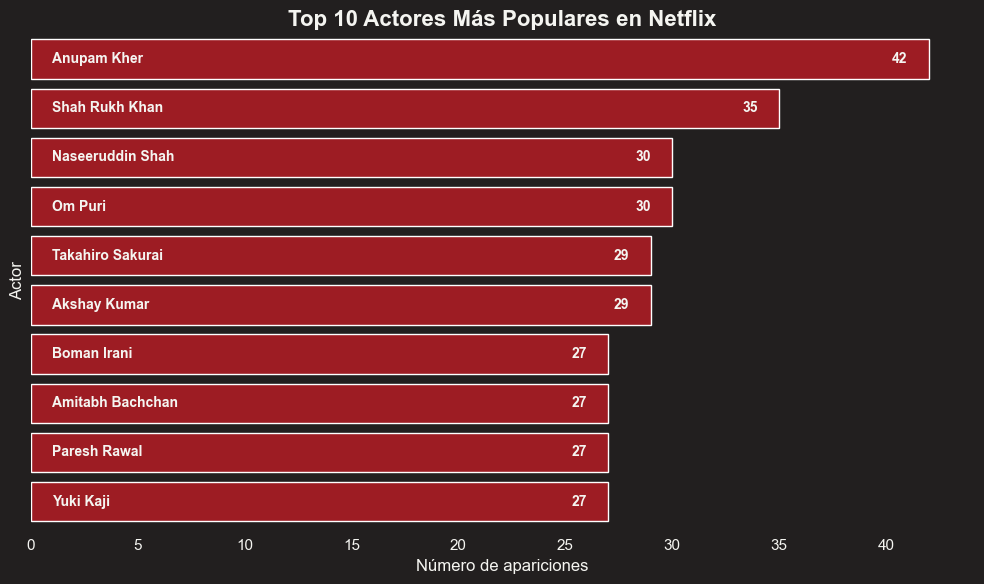

In [33]:
# Separar la columna 'cast' en una lista de actores y limpiar nulos
df['cast'] = df['cast'].fillna('')  # Reemplazar NaN por una cadena vacía
actors = df['cast'].str.split(', ')

# Crear una lista de actores y filtrar los vacíos o desconocidos
actor_list = [actor for sublist in actors for actor in sublist if actor and actor.lower() != 'desconocido/s']

# Contar la frecuencia de los actores
actor_counter = Counter(actor_list)
most_common_actors = actor_counter.most_common(10)  # Obtener los 10 actores más populares

# Crear un DataFrame para los actores más populares
actors_df = pd.DataFrame(most_common_actors, columns=['Actor', 'Count'])

# Definir colores
blanco = '#f5f5f1'
rojoOscuro = '#b20710'
gris = '#221f1f'

# Configurar el gráfico de barras
plt.figure(figsize=(10,6))
plt.gcf().set_facecolor(gris)  # Fondo de la figura completo
bars = sns.barplot(x='Count', y='Actor', data=actors_df, color=rojoOscuro)

# Personalizar el gráfico
plt.title('Top 10 Actores Más Populares en Netflix', fontsize=16, weight='bold', color=blanco)
plt.xlabel('Número de apariciones', fontsize=12, color=blanco)
plt.ylabel('Actor', fontsize=12, color=blanco)
plt.xticks(color=blanco)
plt.yticks([])  # Ocultar los nombres de los actores
plt.grid(False) # Ocultar la grilla
plt.gca().set_facecolor(gris) # Fondo de la gráfica

# Quitar la caja de la gráfica
plt.box(False)

# Quitar las rayitas arriba de los números de los ejes
plt.tick_params(axis='x', colors=blanco)

# Añadir el texto dentro de cada barra
for index, value in enumerate(actors_df['Count']):
    bars.text(value - 1, index, f'{value}', color=blanco, va='center', ha='right', fontsize=10, weight='bold')
    # Añadir el nombre del actor alineado a la izquierda dentro de la barra
    bars.text(1, index, actors_df['Actor'][index], color=blanco, va='center', ha='left', fontsize=10, weight='bold')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


En este gráfico de barras horizontal podemos ver a los 10 actores que más aparecen en los casts de las películas y series de nuestro set de datos de Netflix. Por los nombres y la búsqueda de los actores, podemos ver que la mayoría de la lista son actores indios. Esto podría deberse a que India es uno de los países más poblados del mundo y además son consumidores de cine. El mercado y la demanda son inmensos, por lo que es lógico que se produzca una gran cantidad de películas.

# 9. ¿Cómo se distribuye la duración en series y películas?

In [27]:
# imprimir los valores unicos de duration
print(df['duration'].unique())

# impimir el tipo de dato de duration
print(df['duration'].dtype)

['4 Seasons' '93 min' '78 min' '80 min' '123 min' '1 Season' '95 min'
 '119 min' '118 min' '143 min' '103 min' '89 min' '91 min' '149 min'
 '144 min' '124 min' '87 min' '110 min' '128 min' '117 min' '100 min'
 '2 Seasons' '84 min' '99 min' '90 min' '102 min' '104 min' '105 min'
 '56 min' '125 min' '81 min' '97 min' '106 min' '107 min' '109 min'
 '44 min' '75 min' '101 min' '3 Seasons' '37 min' '113 min' '114 min'
 '130 min' '94 min' '140 min' '135 min' '82 min' '70 min' '121 min'
 '92 min' '164 min' '53 min' '83 min' '116 min' '86 min' '120 min'
 '96 min' '126 min' '129 min' '77 min' '137 min' '148 min' '28 min'
 '122 min' '176 min' '85 min' '22 min' '68 min' '111 min' '29 min'
 '142 min' '168 min' '21 min' '59 min' '20 min' '98 min' '108 min'
 '76 min' '26 min' '156 min' '30 min' '57 min' '150 min' '133 min'
 '115 min' '154 min' '127 min' '146 min' '136 min' '88 min' '131 min'
 '24 min' '112 min' '74 min' '63 min' '38 min' '25 min' '174 min' '60 min'
 '153 min' '158 min' '151 min' '16

C:\Users\P\AppData\Local\Temp\ipykernel_21552\3697833704.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies['Duration_Numeric'] = df_movies['duration'].str.replace(' min', '').astype(int)
C:\Users\P\AppData\Local\Temp\ipykernel_21552\3697833704.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_series['Duration_Numeric'] = df_series['duration'].str.replace(r'[^0-9]', '', regex=True).astype(int)


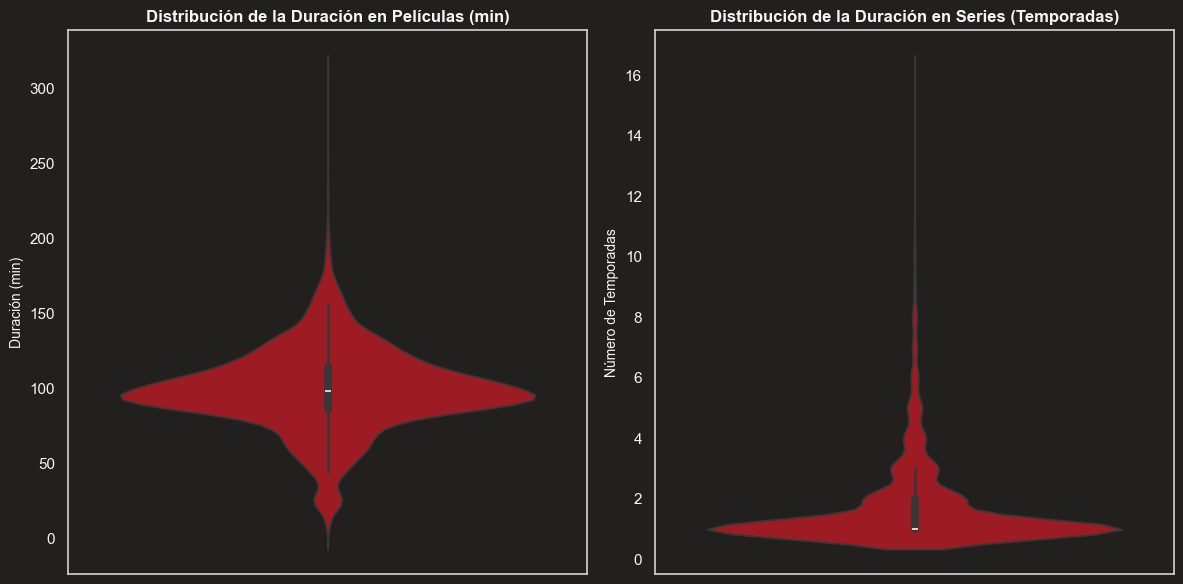

In [28]:
# Separar las filas que corresponden a películas (en minutos) y series (en temporadas)
df_movies = df[df['duration'].str.contains('min', na=False)]  # Filtrar solo películas
df_series = df[df['duration'].str.contains('Season', na=False)]  # Filtrar solo series

# Convertir la duración de películas a valores numéricos en minutos
df_movies['Duration_Numeric'] = df_movies['duration'].str.replace(' min', '').astype(int)

# Limpiar la columna 'duration' en series, eliminando espacios y palabras extra
df_series['Duration_Numeric'] = df_series['duration'].str.replace(r'[^0-9]', '', regex=True).astype(int)

# Configurar los colores de Netflix
blanco = '#f5f5f1'
rojoOscuro = '#b20710'
grisOscuro = '#221f1f'

# Crear una figura con dos gráficos de violín
plt.figure(figsize=(12, 6))

# Gráfico de violín para películas
plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, 1er gráfico
sns.violinplot(y='Duration_Numeric', data=df_movies, color=rojoOscuro)
plt.title('Distribución de la Duración en Películas (min)', fontsize=12, weight='bold', color=blanco)
plt.xlabel('')
plt.ylabel('Duración (min)', fontsize=10, color=blanco)
plt.xticks([])
plt.yticks(color=blanco)
plt.grid(False)
plt.gca().set_facecolor(grisOscuro)

# Gráfico de violín para series
plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, 2do gráfico
sns.violinplot(y='Duration_Numeric', data=df_series, color=rojoOscuro)
plt.title('Distribución de la Duración en Series (Temporadas)', fontsize=12, weight='bold', color=blanco)
plt.xlabel('')
plt.ylabel('Número de Temporadas', fontsize=10, color=blanco)
plt.xticks([])
plt.yticks(color=blanco)
plt.grid(False)
plt.gca().set_facecolor(grisOscuro)

# Cambiar el color del fondo de la figura completa
plt.gcf().set_facecolor(grisOscuro)

# Ajustar el layout y mostrar el gráfico
plt.tight_layout()
plt.show()


In [34]:
# imprimir la cantidad de temporadas de la serie mas larga
print(df_series['Duration_Numeric'].max())

# imprimir la duracion de la pelicula mas larga
print(df_movies['Duration_Numeric'].max())

16
312


### Películas
Podemos ver que la mediana en la duración de las películas está alrededor de los 100 minutos, y que coincide o se parece bastante a la moda. La mayoría de las películas tienen una duración de entre 75 y 120 minutos; de esto podemos decir que probablemente una duración por debajo de ese rango sea poco atrapante para el espectador y que no llegue a involucrarse con la película. Ahora, por encima de este rango, tal vez la película se haga muy larga y no se vea completa, o directamente se opte por otras más cortas.
Como observación, se puede notar que hay muy pocas películas por encima de los 200 minutos, lo que provoca ese pico en el gráfico.

### Series
En las series, podemos ver que la mayoría son de una única temporada, y que también hay una buena cantidad de series con 2 temporadas. El resto se reparten en su mayoría entre 3 y 5 temporadas, y se llega hasta un pico de 16 temporadas en "Grey's Anatomy". La poca cantidad de temporadas en la mayoría de las series, al igual que en las películas (el largo en minutos) puede ser debido a que los espectadores no están dispuestos a seguir series largas.

In [35]:
print(actors)

0       [João Miguel, Bianca Comparato, Michel Gomes, ...
1       [Demián Bichir, Héctor Bonilla, Oscar Serrano,...
2       [Tedd Chan, Stella Chung, Henley Hii, Lawrence...
3       [Elijah Wood, John C. Reilly, Jennifer Connell...
4       [Jim Sturgess, Kevin Spacey, Kate Bosworth, Aa...
                              ...                        
7782    [Imad Creidi, Antoinette Turk, Elias Gergi, Ca...
7783    [Vicky Kaushal, Sarah-Jane Dias, Raaghav Chana...
7784                                            [Nasty C]
7785                         [Adriano Zumbo, Rachel Khoo]
7786                                      [Desconocido/s]
Name: cast, Length: 7787, dtype: object


# 10. ¿Hay palabras que se utilicen más que otras en titulos y descripciones?

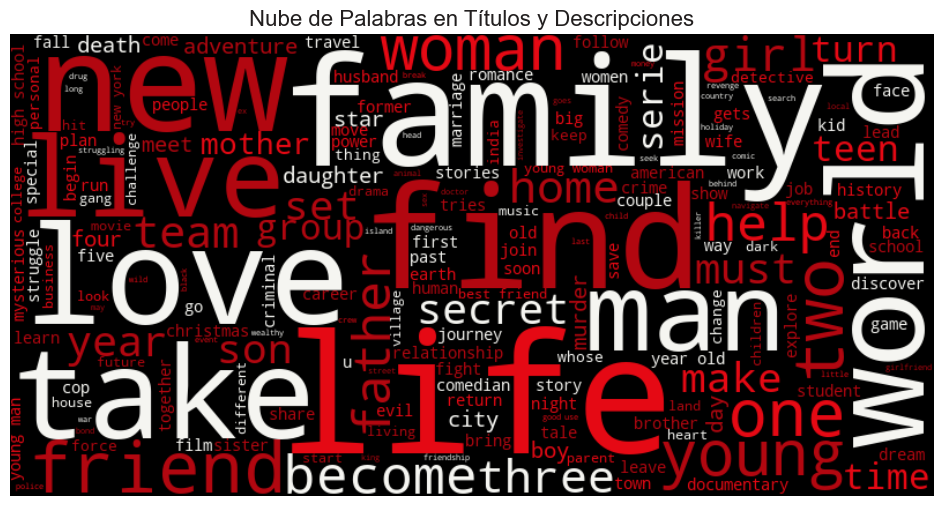

In [20]:
import re
from wordcloud import WordCloud
import random

# Leer el archivo de stop words
with open('stop_words.txt', 'r') as file:
    stop_words = set(file.read().splitlines())

# Concatenar las columnas 'title' y 'description'
text = ' '.join(df['title'].dropna().astype(str)) + ' ' + ' '.join(df['description'].dropna().astype(str))

# Convertir el texto a minúsculas
text = text.lower()

# Eliminar caracteres especiales, signos de puntuación y números (solo conservar letras y espacios)
# Además, eliminamos múltiples espacios y los reemplazamos por uno solo
text = re.sub(r'[^a-z\s]', ' ', text)  # Reemplazar cualquier cosa que no sea letras por un espacio
text = re.sub(r'\s+', ' ', text)  # Reemplazar múltiples espacios por un solo espacio

# Dividir en palabras
words = text.split()

# Eliminar las stop words
filtered_words = [word for word in words if word not in stop_words]

# Volver a unir las palabras filtradas en un solo texto
filtered_text = ' '.join(filtered_words)

# Función personalizada para asignar colores
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    colors = ['#e50914', '#b20710', '#f5f5f1']  # Colores especificados
    return random.choice(colors)

# Crear la nube de palabras con la función de colores personalizada
wordcloud = WordCloud(width=800, height=400, background_color='black', color_func=color_func).generate(filtered_text)

# Mostrar la nube de palabras
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras en Títulos y Descripciones', fontsize=16, color='#221f1f')
plt.show()
